In [2]:

#Import libraries
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib
import os
import requests
import zipfile

In [3]:
#creating data directory folders for the downloaded data using os and pathlib


studyarea_data = os.path.join("C:/Users/arago/Documents/GitHub/habitatmodel-main/")

#habitamodel_dir = os.path.join()
#make study area folder
os.makedirs(studyarea_data, exist_ok=True)

#make land data folder
os.makedirs("C:/Users/arago/Documents/GitHub/habitatmodel-main/studyarea_data/USFS", exist_ok=True)

In [4]:
#Creating variable and directories for the downloaded zip file

usfs_url="https://data.fs.usda.gov/geodata/edw/edw_resources/shp/S_USA.NationalGrassland.zip"
studyarea_data = r"C:/Users/arago/Documents/GitHub/habitatmodel-main/studyarea_data/USFS"
file_name="NatGrassland.zip"

usfs_dir= os.path.join(studyarea_data, 'NatGrassland')
os.makedirs(usfs_dir, exist_ok=True)

usfs_zip_path= os.path.join(usfs_dir, file_name)
usfs_path=os.path.join(usfs_dir,'NatGrassland')

In [5]:
#Used chatgpt to correct this section since my previous created script was not working

#Downloading the zip file data and extracting the data to the set directory

# Function to download the ZIP file
def download_file(url, usfs_dir):
    try:
        print(f"Downloading from USDA website: {url}")
        response = requests.get(url, stream=True)
        response.raise_for_status()  # Raise HTTPError for bad responses
        
        # Save the file in chunks
        with open(usfs_dir, "wb") as file:
            for chunk in response.iter_content(chunk_size=1024):
                if chunk:  # Filter out keep-alive chunks
                    file.write(chunk)
        print(f"File downloaded and saved to: {usfs_dir}")
    except requests.exceptions.RequestException as e:
        print(f"Error downloading file: {e}")

# Function to extract ZIP file
def extract_zip(zip_file_path, extract_to):
    try:
        print(f"Extracting {zip_file_path}...")
        with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
            zip_ref.extractall(extract_to)
        print(f"Contents extracted to: {extract_to}")
    except zipfile.BadZipFile as e:
        print(f"Error: The file is not a valid ZIP archive: {e}")

# Step 1: Download the ZIP file
if not os.path.exists(usfs_zip_path):
    download_file(usfs_url, usfs_zip_path)
else:
    print(f"ZIP file already exists at: {usfs_zip_path}")

# Step 2: Extract the ZIP file
if not os.path.exists(usfs_path):
    extract_zip(usfs_zip_path, usfs_dir)
else:
    print(f"Extracted directory already exists at: {usfs_path}")

ZIP file already exists at: C:/Users/arago/Documents/GitHub/habitatmodel-main/studyarea_data/USFS\NatGrassland\NatGrassland.zip
Extracting C:/Users/arago/Documents/GitHub/habitatmodel-main/studyarea_data/USFS\NatGrassland\NatGrassland.zip...
Contents extracted to: C:/Users/arago/Documents/GitHub/habitatmodel-main/studyarea_data/USFS\NatGrassland


In [6]:
#checking the shapefile contents

#defining the shapefile path
usfs_shp_path= r"C:\Users\arago\Documents\GitHub\habitatmodel-main\studyarea_data\USFS\NatGrassland\S_USA.NationalGrassland.shp"

#loading the shapefile
usfs_gdf=gpd.read_file(usfs_shp_path)

print(usfs_gdf.columns)

Index(['NATIONALGR', 'GRASSLANDN', 'GIS_ACRES', 'SHAPE_AREA', 'SHAPE_LEN',
       'geometry'],
      dtype='object')


c:\Users\arago\miniconda3\envs\earth-analytics-python\Lib\site-packages\pyogrio\core.py:35: RuntimeWarning: Could not detect GDAL data files.  Set GDAL_DATA environment variable to the correct path.
  _init_gdal_data()


In [7]:
#checking the shapefiles contents in a more structured way by defining the dataframe and printing it

usfs_gdf=gpd.read_file(usfs_shp_path)

#converting the gdf to pandas dataframe so I can read the structure of the table
usfs_df= usfs_gdf.drop(columns='geometry')



usfs_df

,NATIONALGR,GRASSLANDN,GIS_ACRES,SHAPE_AREA,SHAPE_LEN
0,281771010328,Fort Pierre National Grassland,209044.225,0.095149,1.455518
1,295507010328,Butte Valley National Grassland,19489.170,0.008557,0.853736
2,295508010328,Kiowa National Grassland,144281.321,0.058543,9.858642
3,295509010328,Sheyenne National Grassland,70428.175,0.033356,4.097398
4,295510010328,Cedar River National Grassland,6717.517,0.003157,0.999947
5,295511010328,Black Kettle National Grassland,33103.349,0.013340,4.561060
6,295512010328,Rita Blanca National Grassland,94127.091,0.038271,6.652113
7,295513010328,Thunder Basin National Grassland,626249.208,0.282888,44.088050
8,295514010328,McClellan Creek National Grassland,1401.715,0.000562,0.115902
9,295515010328,Caddo National Grassland,68479.549,0.026940,1.159342


<Axes: >

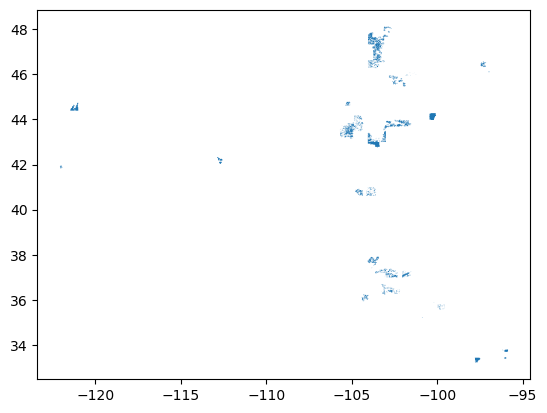

In [9]:

usfs_gdf.plot()

In [12]:
%store usfs_df usfs_shp_path usfs_gdf studyarea_data

Stored 'usfs_df' (DataFrame)
Stored 'usfs_shp_path' (str)
Stored 'usfs_gdf' (GeoDataFrame)
Stored 'studyarea_data' (str)
